<a href="https://colab.research.google.com/github/jcjimenezb123/MetodosNumericosPython/blob/master/ODES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se tiene un intercambiador de calor de tubos concentricos en contracorriente y sin cambio de fase.Las ecuaciones que describen el intercambiador de calor en ciertas condiciones de operación son:

$$
\frac{dT_B}{dx}=0.03(T_S-T_B)\\
\frac{dT_S}{dx}=0.04(T_S-T_B)
$$

Calcular $T_{B1}$ y $T_{S0}$ si el intercambiador de calor tiene una longitud de $3m$

$$
T_{S1}=100\\
T_{B0}=20
$$

In [ ]:
from scipy.integrate import odeint
import numpy as np

In [ ]:
def f(T,x):
  tb,ts=T
  dtbdx=0.03*(ts-tb)
  dtsdx=0.04*(ts-tb)
  return np.array([dtbdx,dtsdx])

In [ ]:
x0=0
xn=3
distancia=np.linspace(x0,xn)
t0=[20,100]
tbts=odeint(f,t0,distancia)
tbts

In [ ]:
import plotly.express as px
fig=px.scatter(x=distancia,y=tbts[:,0])
fig.add_scatter(x=distancia,y=tbts[:,1])
fig.show()

Considere un sistema ecológico simple compuesto solamente de coyotes $y$ y correcaminos $x$, donde los primeros se alimentan de los segundos. Los tamaños de las poblaciones cambian de acuerdo a las siguientes ecuaciones:

$$
\frac{dx}{dt}=0.4x-0.02xy\\
\frac{dy}{dt}=0.001xy-0.3y
$$

$x(0)=30$ $y(0)=3$

In [ ]:
def f(P,t):
  y,x=P
  dxdt=0.4*x-0.02*x*y
  dydt=0.001*x*y-0.3*y
  return np.array([dydt,dxdt])

In [ ]:
t0,tn=0,100
tiempo=np.linspace(t0,tn,400)
P0=[3,30]
p=odeint(f,P0,tiempo)
p

In [ ]:
fig=px.line(x=tiempo,y=p[:,0])
fig.add_scatter(x=tiempo,y=p[:,1])
fig.show()

El tanque 1 contiene 50 galones de solución en la que están disueltas 25
libras de sal; el tanque 2 contiene 50 galones de agua pura; se bombea líquido hacia y
desde los tanques en las cantidades indicadas en la figura. Calcular el cambio de la masa de sal disuelta en cada tanque, con respecto al tiempo.

para el tanque 1 se tiene:

$$
\frac{dx_1}{dt}=\frac{3gal}{min}\left(0\right)-\frac{1gal}{min}\left(\frac{x_2}{50}\right)-\frac{4gal}{min}\left(\frac{x_1}{50}\right)=-\frac{2}{25}x_1+\frac{1}{50}x_2
$$

para el tanque 2 se tiene:

$$
\frac{dx_2}{dt}=\frac{4gal}{min}\left(\frac{x_1}{50}\right)-\frac{1gal}{min}\left(\frac{x_2}{50}\right)-\frac{3gal}{min}\left(\frac{x_2}{50}\right)=\frac{2}{25}x_1-\frac{2}{25}x_2
$$

In [ ]:
def f(C,t):
  x1,x2=C
  dx1dt=-2/25*x1+x2/50
  dx2dt=2/25*x1-2/25*x2
  return np.array([dx1dt,dx2dt])

In [ ]:
t0 =0 # valor inicial de tiempo
C0 =[25,0] # condiciones iniciales de
t1 =50 # valor final del tiempo
tiempo =np.linspace (t0,t1) #11 es para 10 pasos
# llamada a la funcion odeint
sol = odeint(f,C0,tiempo )
sol

In [ ]:
fig=px.line(x=tiempo,y=sol[:,0])
fig.add_scatter(x=tiempo,y=sol[:,1])
fig.show()

El benceno $(C_6H_6)$ reacciona con cloro $(Cl_2)$ a 55C, haciendo pasar una corriente de gas cloro a traves de benceno liquido, que se encuentra en el interior del reactor, segun las siguientes reacciones consecutivas

$$
C_6H_6+Cl_2\rightarrow C_6H_5Cl+HCl\\
C_6H_5Cl+Cl_2\rightarrow C_6H_4Cl_2+HCl\\
C_6H_4Cl_2+Cl_2\rightarrow C_6H_3Cl_3+HCl
$$

In [ ]:
def f(X,t):
  x1,x2,x3,x4=X
  k1=1
  k2=2
  k3=3
  dx1dt=-k1*x1
  dx2dt=k1*x1-k2*x2
  dx3dt=k2*x2-k3*x3
  dx4dt=k3*x3
  return np.array([dx1dt,dx2dt,dx3dt,dx4dt])

In [ ]:
t0=0
tn=2
tiempo=np.linspace(t0,tn)
X0=[1,0,0,0]
X=odeint(f,X0,tiempo)


In [ ]:
fig=px.scatter(x=tiempo,y=X[:,0])
fig.add_scatter(x=tiempo,y=X[:,1])
fig.add_scatter(x=tiempo,y=X[:,2])
fig.add_scatter(x=tiempo,y=X[:,3])
fig.show()

#Atractor de Lorenz

El atractor de Lorenz es un concepto introducido por Edward Lorenz en 1963. Se trata de un sistema dinámico determinista tridimensional no lineal derivado de las ecuaciones simplificadas de rollos de convección que se producen en las ecuaciones dinámicas de la atmósfera terrestre.

Para ciertos valores de los parámetros a, b, c, el sistema exhibe un comportamiento caótico y muestra lo que actualmente se llama un atractor extraño; esto fue probado por Warwick Tucker en 2002.

El sistema de Lorenz es un conjunto de tres ecuaciones diferenciales ordinarias acopladas
que representan la conveccion de fluidos atmosfericos en tres dimensiones:

$$
\frac{dx}{dt}=a(y-x)\\
\frac{dy}{dt}=x(b-z)-y\\
\frac{dz}{dt}=xy-cz
$$

donde a es llamado el número de Prandtl y b se llama el número de Rayleigh y c es una constante de proporcionalidad. Con $(x,y,z) \in R$

a,b,c>0, pero es usualmente a=10, c=8/3 y b es variado. El sistema exhibe un comportamiento caótico para b=28 pero muestra órbitas periódicas para otros valores de b; para valores de b ≥ 28 el sistema es caotico.

El sistema de Lorenz tiene un importante desarrollo historico en la mecanica de fluidos atmosfericos, y sirve de paradigma para otros estudios aplicados a dinamicas caoticas.

La forma de mariposa del atractor de Lorenz puede haber inspirado el nombre del efecto mariposa en la teoría del caos.

In [ ]:
def f(X,t):
  x,y,z=X
  a=10
  b=28
  c=8/3
  dxdt=a*(y-x)
  dydt=x*(b-z)-y
  dzdt=x*y-c*z

  return np.array([dxdt,dydt,dzdt])

In [ ]:
tiempo=np.linspace(0,40,4000)
y0=[1.,1.,1.]
Y=odeint(f,y0,tiempo)
Y

array([[ 1.        ,  1.        ,  1.        ],
       [ 1.01257193,  1.25998526,  0.98488767],
       [ 1.04884523,  1.52413499,  0.97310936],
       ...,
       [-4.98998112, -7.80248394, 17.25212381],
       [-5.28034316, -8.27541206, 17.20546736],
       [-5.58947219, -8.77691774, 17.20996911]])

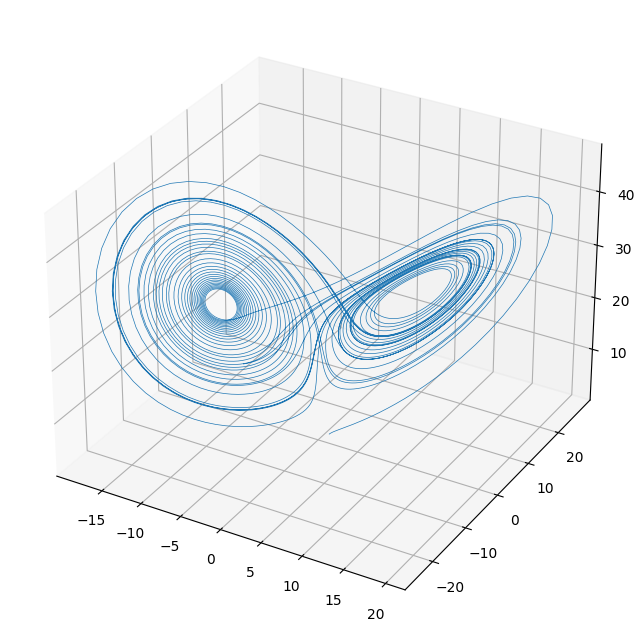

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,10))
ax = plt.axes(projection='3d')
ax.plot3D(Y[:, 0], Y[:, 1], Y[:, 2],linewidth=0.5)
plt.show()

In [ ]:
import plotly.express as px

fig = px.line_3d(x=Y[:,0], y=Y[:,1], z=Y[:,2])
fig.show()